# Modelamiento de la resistencia del concreto de alto desempeño, usando redes neuronales articiales

Referencia:  MODELING OF STRENGTH OF HIGH-PERFORMANCE CONCRETE USING ARTIFICIAL NEURAL NETWORKS, I.-C. Yeh, 
Cement and Concrete Research, Vol. 28, No. 12, pp. 1797–1808, 1998

In [1]:
# pip install keras
# pip install graphviz
# pip install ann_visualizer

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import ann_visualizer
import graphviz
import math

In [2]:
# Cargue del dataset

df = pd.read_csv(r'C:\Users\jgarcia.d\datos\Concrete_Data_Yeh.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0          

In [3]:
x_org = df.drop('csMPa',axis=1).values
y_org = df['csMPa'].values

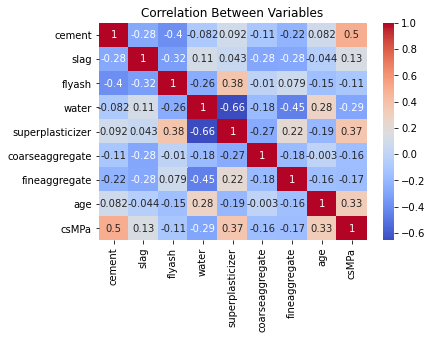

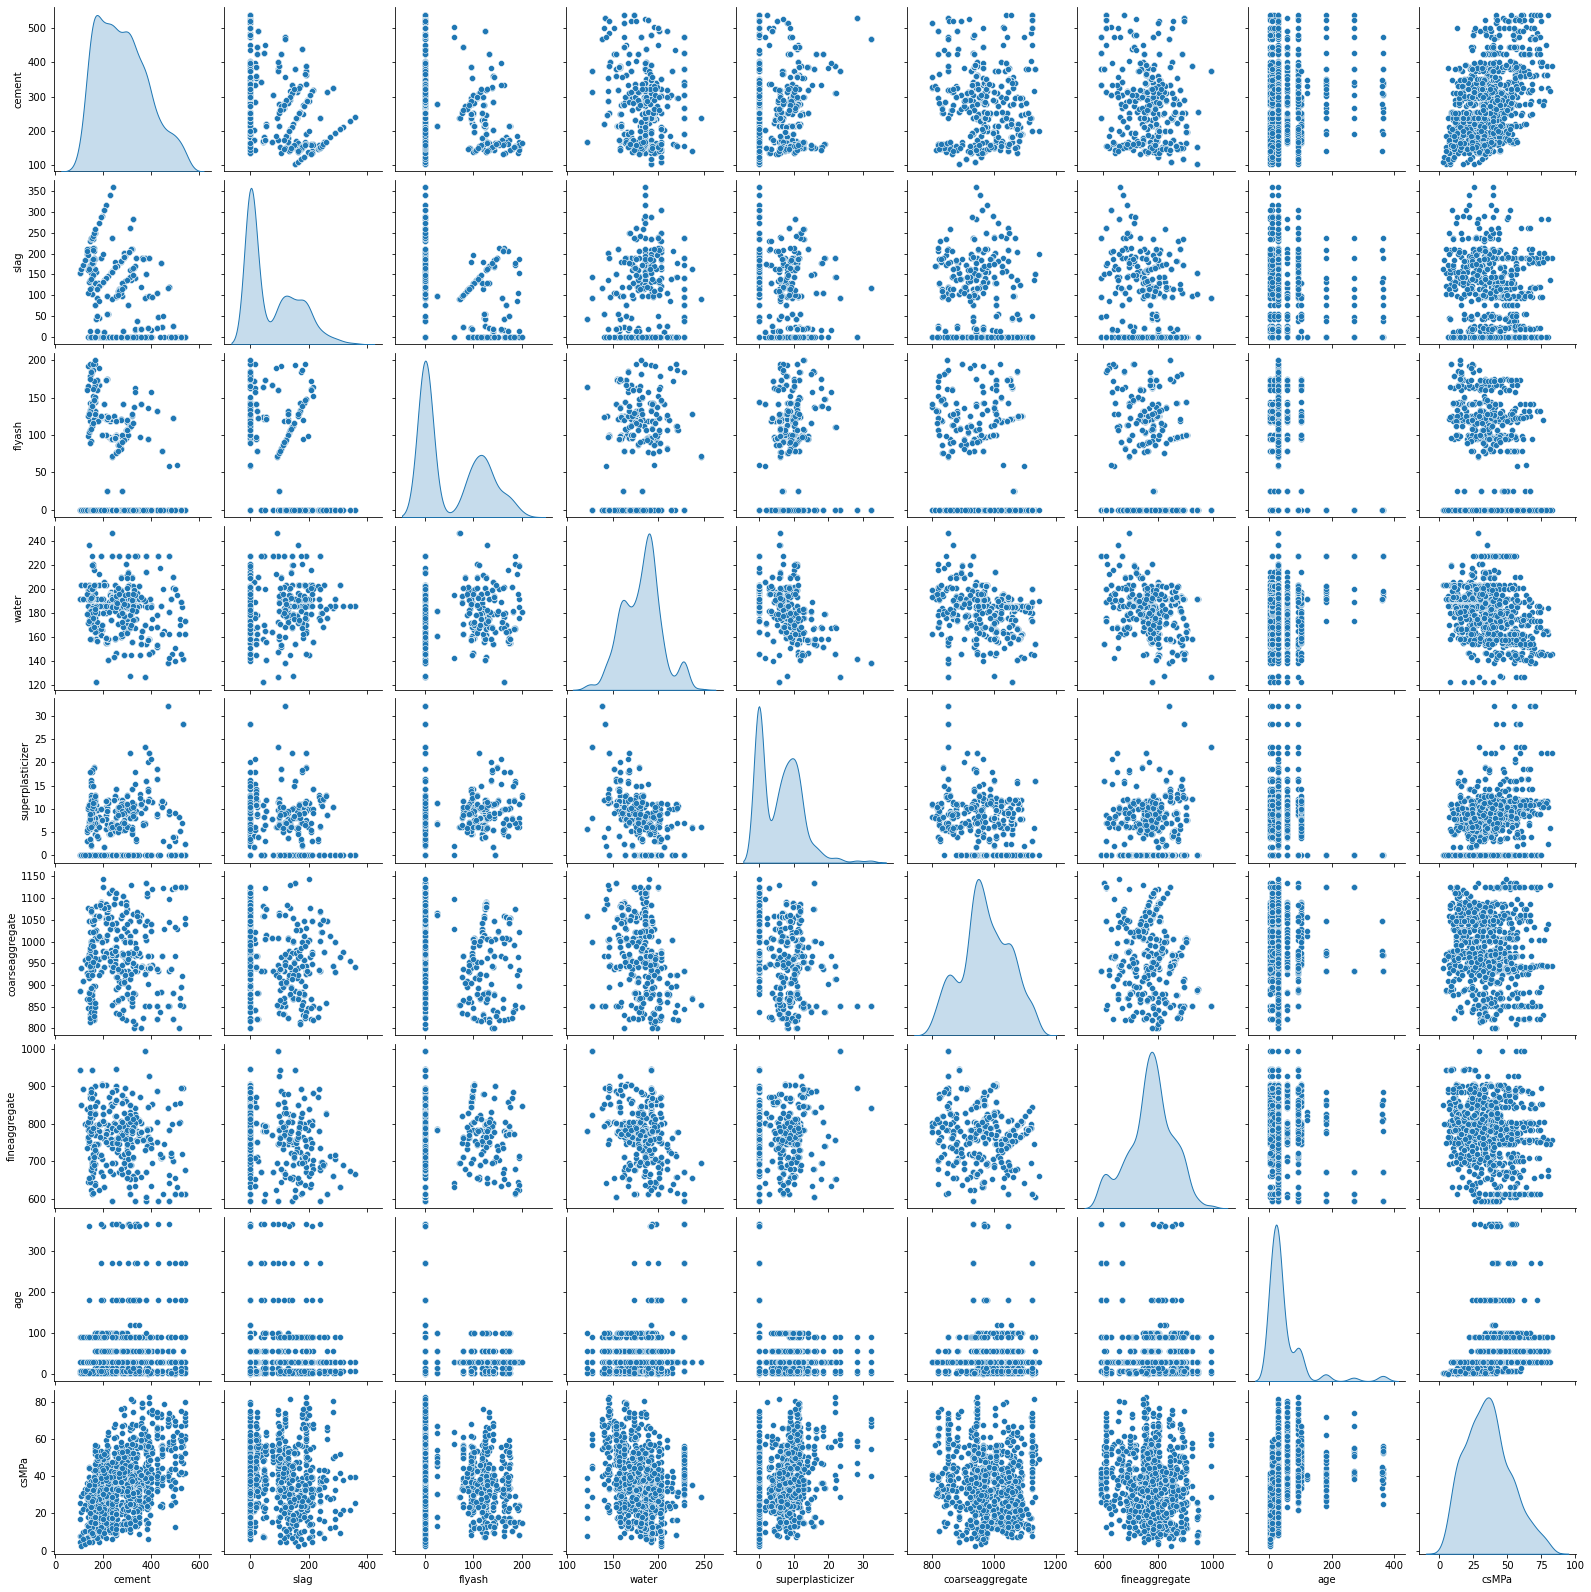

In [4]:
## Mapas de correlación

corr = df.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')
plt.title("Correlation Between Variables")
plt.savefig('1.png')

# # pair Plot
sns.pairplot(df,palette="husl",diag_kind="kde")
plt.savefig('2.png')

In [4]:
# División del dataset en entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_org,y_org, test_size=0.25)

# Escalamiento de variables

# Z-SCORE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MIN-MAX
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [5]:
# Definición de la Red Neuronal para regresión

from keras.models import Sequential
from keras.layers import Dense
from keras import backend

In [6]:
# Definición del Error Cuadrado Medio como la función métrica

def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [7]:
# Construcción del primer modelo: una capa oculta con 5 nodos

model1 = Sequential()

# Capa de entrada y Capa oculta - con neurona de sesgo
model1.add(Dense(5,input_dim=8, use_bias=True, activation = 'sigmoid'))

# Capa de salida
model1.add(Dense(1, use_bias=True, activation='linear'))

In [8]:
# Visualización de la red neuronal

from ann_visualizer.visualize import ann_viz;
ann_viz(model1,  title="Red Neuronal para estimar resistencia del concreto")

In [8]:
# Optimizar , Compilar y Entrenar el Modelo
from numpy.random import seed

seed(1)
opt =keras.optimizers.Adam(lr=0.015)

model1.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model1.fit(X_train,y_train,epochs = 100, batch_size=32,validation_split=0.1)

print(model1.summary())

Epoch 1/100
22/22 [==============================] - 3s 119ms/step - loss: 1491.3817 - rmse: 34.6089 - val_loss: 1300.1621 - val_rmse: 32.6640
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 1416.5921 - rmse: 33.8418 - val_loss: 1199.4568 - val_rmse: 31.1981
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 1341.1042 - rmse: 32.6158 - val_loss: 1091.3888 - val_rmse: 29.5126
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 1192.7534 - rmse: 30.2550 - val_loss: 976.3038 - val_rmse: 27.5427
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 1002.2333 - rmse: 27.2576 - val_loss: 862.8781 - val_rmse: 25.5480
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 986.2469 - rmse: 26.7272 - val_loss: 754.7200 - val_rmse: 23.5766
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 813.9930 - rmse: 23.8218 - val_loss: 660.6429 - val_rmse: 21.7774
Epoch 8/100
22/22

In [13]:
# Predicción y cálculo de los coeficientes de determinación y correlación

y_predict_e = model1.predict(X_train)
y_predict = model1.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2e = r2_score(y_train,y_predict_e)
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN ENTRENAMIENTO")
print("coeficiente de determinación: ", R2e)
print("coeficiente de correlación: ", math.sqrt(R2e))
print("MSE: ", mean_squared_error(y_train,y_predict_e))

R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN PRUEBA")
print("coeficiente de determinación: ", R2)
print("coeficiente de correlación: ", math.sqrt(R2))
print("MSE: ", mean_squared_error(y_test,y_predict))


DESEMPEÑO EN ENTRENAMIENTO
coeficiente de determinación:  0.8641407909602569
coeficiente de correlación:  0.9295917334831764
MSE:  37.43737642237498

DESEMPEÑO EN PRUEBA
coeficiente de determinación:  0.8501803630707218
coeficiente de correlación:  0.9220522561496836
MSE:  42.77341013341634


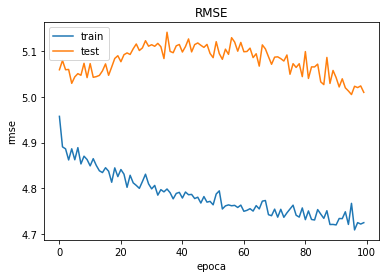

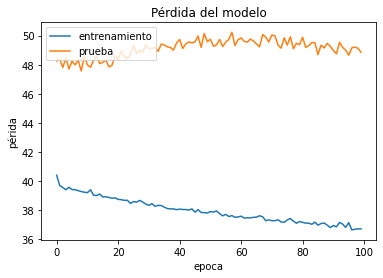

In [14]:
# Gráfico de la función de pérdida y el RMSE para datasets de entrenamiento y prueba
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('RMSE')
plt.ylabel('rmse')
plt.xlabel('epoca')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Resumen de la historia para la función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('pérdida')
plt.xlabel('epoca')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.savefig('4.png')
plt.show()

In [15]:
# Construcción de un segundo modelo: dos capas ocultas con 5 nodos

model2=Sequential()

# Capa de entrada y Primera capa oculta - con neurona de sesgo
model2.add(Dense(5, input_dim=8, use_bias=True, activation = 'sigmoid'))

# Segunda capa oculta - con neurona de sesgo
model2.add(Dense(5, use_bias=True, activation='sigmoid'))

# Capa de salida
model2.add(Dense(1,activation='linear'))

In [15]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model2, title="Red Neuronal para estimar resistencia del concreto")

In [21]:
# Optimizar , Compilar y Entrenar el Modelo
from numpy.random import seed

seed(1)
opt =keras.optimizers.Adam(lr=0.015)

model2.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model2.fit(X_train,y_train,epochs = 300 ,batch_size=32,validation_split=0.1)

print(model2.summary())

Epoch 1/300
22/22 [==============================] - 1s 11ms/step - loss: 34.6741 - rmse: 4.5122 - val_loss: 49.3788 - val_rmse: 5.1133
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 37.1235 - rmse: 4.6329 - val_loss: 50.1011 - val_rmse: 5.1556
Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 34.7891 - rmse: 4.4701 - val_loss: 50.0348 - val_rmse: 5.1649
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 31.3713 - rmse: 4.2949 - val_loss: 48.2574 - val_rmse: 5.0978
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 36.7557 - rmse: 4.6229 - val_loss: 50.5735 - val_rmse: 5.2106
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 28.5667 - rmse: 4.0769 - val_loss: 51.0058 - val_rmse: 5.2033
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 35.0169 - rmse: 4.5721 - val_loss: 49.4174 - val_rmse: 5.1778
Epoch 8/300
22/22 [==============================] - 0

In [22]:
# Predicción y cálculo de los coeficientes de determinación y correlación

y_predict_e = model2.predict(X_train)
y_predict = model2.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2e = r2_score(y_train,y_predict_e)
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN ENTRENAMIENTO")
print("coeficiente de determinación: ", R2e)
print("coeficiente de correlación: ", math.sqrt(R2e))
print("MSE: ", mean_squared_error(y_train,y_predict_e))

R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN PRUEBA")
print("coeficiente de determinación: ", R2)
print("coeficiente de correlación: ", math.sqrt(R2))
print("MSE: ", mean_squared_error(y_test,y_predict))


DESEMPEÑO EN ENTRENAMIENTO
coeficiente de determinación:  0.880475834479634
coeficiente de correlación:  0.9383367383192635
MSE:  32.93609029364517

DESEMPEÑO EN PRUEBA
coeficiente de determinación:  0.8492968981529506
coeficiente de correlación:  0.9215730563297467
MSE:  43.025638800104055


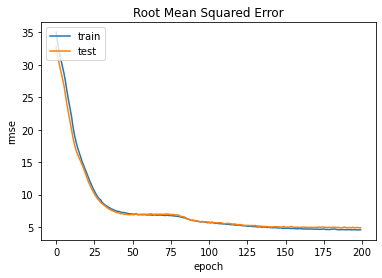

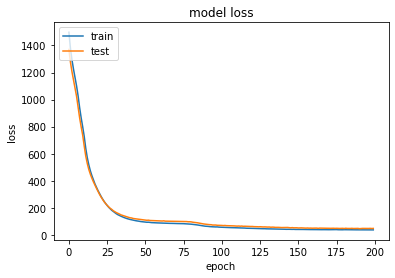

In [18]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()

In [23]:
# Construcción de un tercer modelo: tres capas ocultas con 5 nodos

model3 = Sequential()

# Capa de entrada y Primera capa oculta - con neurona de sesgo
model3.add(Dense(5, input_dim=8, use_bias=True, activation = 'sigmoid'))

# Segunda capa oculta - con neurona de sesgo
model3.add(Dense(5, use_bias=True, activation='sigmoid'))

# Tercera capa oculta - con neurona de sesgo
model3.add(Dense(5, use_bias=True, activation='sigmoid'))

# Capa de salida
model3.add(Dense(1,activation='linear'))

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model3, title="Red Neuronal para estimar resistencia del concreto")

In [26]:
# Optimizar , Compilar y Entrenar el Modelo
from numpy.random import seed

seed(1)
opt =keras.optimizers.Adam(lr=0.015)

model3.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model3.fit(X_train,y_train,epochs = 500 ,batch_size=10,validation_split=0.1)

print(model3.summary())

Epoch 1/500
70/70 [==============================] - 1s 4ms/step - loss: 35.9047 - rmse: 4.6744 - val_loss: 52.7749 - val_rmse: 4.8640
Epoch 2/500
70/70 [==============================] - 0s 2ms/step - loss: 34.1464 - rmse: 4.5238 - val_loss: 50.7650 - val_rmse: 4.8577
Epoch 3/500
70/70 [==============================] - 0s 2ms/step - loss: 34.5565 - rmse: 4.5038 - val_loss: 46.8471 - val_rmse: 4.6720
Epoch 4/500
70/70 [==============================] - 0s 2ms/step - loss: 36.0940 - rmse: 4.7613 - val_loss: 49.1895 - val_rmse: 4.7371
Epoch 5/500
70/70 [==============================] - 0s 2ms/step - loss: 33.6087 - rmse: 4.4912 - val_loss: 47.6881 - val_rmse: 4.6676
Epoch 6/500
70/70 [==============================] - 0s 2ms/step - loss: 36.5241 - rmse: 4.6475 - val_loss: 48.8099 - val_rmse: 4.8530
Epoch 7/500
70/70 [==============================] - 0s 2ms/step - loss: 34.1656 - rmse: 4.6165 - val_loss: 49.8186 - val_rmse: 4.9075
Epoch 8/500
70/70 [==============================] - 0s

In [27]:
# Predicción y cálculo de los coeficientes de determinación y correlación

y_predict_e = model3.predict(X_train)
y_predict = model3.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2e = r2_score(y_train,y_predict_e)
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN ENTRENAMIENTO")
print("coeficiente de determinación: ", R2e)
print("coeficiente de correlación: ", math.sqrt(R2e))
print("MSE: ", mean_squared_error(y_train,y_predict_e))

R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN PRUEBA")
print("coeficiente de determinación: ", R2)
print("coeficiente de correlación: ", math.sqrt(R2))
print("MSE: ", mean_squared_error(y_test,y_predict))


DESEMPEÑO EN ENTRENAMIENTO
coeficiente de determinación:  0.8992814985761042
coeficiente de correlación:  0.9483045389410009
MSE:  27.753999726296552

DESEMPEÑO EN PRUEBA
coeficiente de determinación:  0.8560543981116158
coeficiente de correlación:  0.9252320779737458
MSE:  41.09637690137868


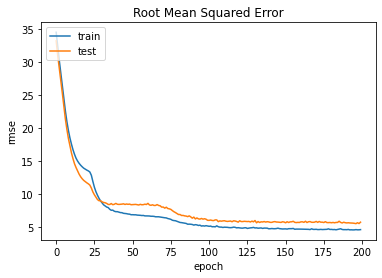

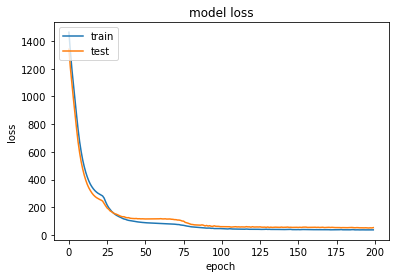

In [24]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()

In [27]:
# Construcción del cuarto modelo: una capa oculta con 8 nodos

model4 = Sequential()

# Capa de entrada y Capa oculta - con neurona de sesgo
model4.add(Dense(8, input_dim=8, use_bias=True, activation = 'sigmoid'))

# Capa de salida
model4.add(Dense(1,activation='linear'))

In [28]:
# Visualización de la red neuronal

from ann_visualizer.visualize import ann_viz;
ann_viz(model4,  title="Red Neuronal para estimar resistencia del concreto")

In [29]:
# Optimizar , Compilar y Entrenar el Modelo
from numpy.random import seed

seed(1)
opt =keras.optimizers.Adam(lr=0.015)

model1.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model1.fit(X_train,y_train,epochs = 500, batch_size=32,validation_split=0.1)

print(model1.summary())

Epoch 1/500
22/22 [==============================] - 1s 8ms/step - loss: 1399.4825 - rmse: 33.7717 - val_loss: 1294.7158 - val_rmse: 32.6502
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 1407.6952 - rmse: 33.8607 - val_loss: 1141.8553 - val_rmse: 30.3822
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 1123.8455 - rmse: 29.8141 - val_loss: 980.5724 - val_rmse: 27.6922
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 1002.0855 - rmse: 27.4205 - val_loss: 822.5866 - val_rmse: 24.7804
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 790.8353 - rmse: 24.1214 - val_loss: 683.1265 - val_rmse: 21.9547
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 727.2398 - rmse: 22.3205 - val_loss: 564.1545 - val_rmse: 19.5150
Epoch 7/500
22/22 [==============================] - 0s 3ms/step - loss: 545.5142 - rmse: 18.6457 - val_loss: 469.0894 - val_rmse: 17.3753
Epoch 8/500
22/22 [==

In [30]:
# Predicción y cálculo de los coeficientes de determinación y correlación

y_predict_e = model1.predict(X_train)
y_predict = model1.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2e = r2_score(y_train,y_predict_e)
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN ENTRENAMIENTO")
print("coeficiente de determinación: ", R2e)
print("coeficiente de correlación: ", math.sqrt(R2e))
print("MSE: ", mean_squared_error(y_train,y_predict_e))

R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN PRUEBA")
print("coeficiente de determinación: ", R2)
print("coeficiente de correlación: ", math.sqrt(R2))
print("MSE: ", mean_squared_error(y_test,y_predict))


DESEMPEÑO EN ENTRENAMIENTO
coeficiente de determinación:  0.8895513188619874
coeficiente de correlación:  0.943160282699599
MSE:  29.912750047402223

DESEMPEÑO EN PRUEBA
coeficiente de determinación:  0.8754751729794772
coeficiente de correlación:  0.9356683028613704
MSE:  37.55809671694659


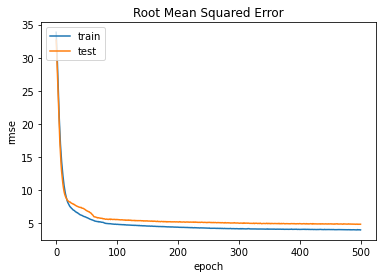

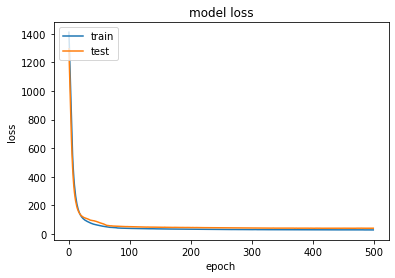

In [31]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()